## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results = mouse_metadata.merge(study_results, on="Mouse ID")
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_regimen = mouse_study_results.groupby('Drug Regimen')

tumor_stats_by_drug = pd.DataFrame()
tumor_stats_by_drug["Mean Tumor Size"] = groupby_regimen.mean()['Tumor Volume (mm3)']
tumor_stats_by_drug["Median Tumor Size"] = groupby_regimen.median()['Tumor Volume (mm3)']
tumor_stats_by_drug["Tumor Size Variance"] = groupby_regimen.var()['Tumor Volume (mm3)']
tumor_stats_by_drug["Tumor Size Standard Deviation"] = groupby_regimen.std()['Tumor Volume (mm3)']

#I don't actually know how to run the sem function on a grouped data set, so I broke the set into 
# subsets for each drug and took stats then. 

per_drug_tumor_sems = {}
#For each drug
for drug in mouse_study_results["Drug Regimen"].unique():
    #Filter for only the subset where Drug Regimen == this drug
    specific_drug_results = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == drug]
    #Run SEM function on filtered data 
    specific_drug_tumor_sem = st.sem(specific_drug_results["Tumor Volume (mm3)"])
    #Write SEM for this drug to dict
    per_drug_tumor_sems[drug] = specific_drug_tumor_sem

#put the dict into the series to match the tumor stats by index    
per_drug_tumor_sems = pd.Series(per_drug_tumor_sems)   
#Add series as a new column on our dataframe
tumor_stats_by_drug["Tumor Size SEM"] = per_drug_tumor_sems    
tumor_stats_by_drug 

,Mean Tumor Size,Median Tumor Size,Tumor Size Variance,Tumor Size Standard Deviation,Tumor Size SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'n')

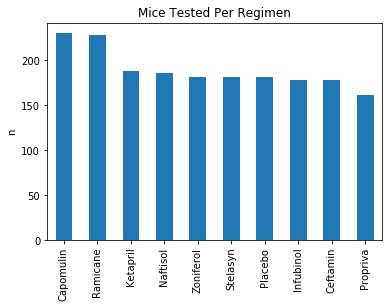

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ax = mouse_study_results["Drug Regimen"].value_counts().plot(title="Mice Tested Per Regimen", kind="bar")
ax.set_ylabel("n")

Text(0.5, 1.0, 'Number of Data Points per Drug Regimen')

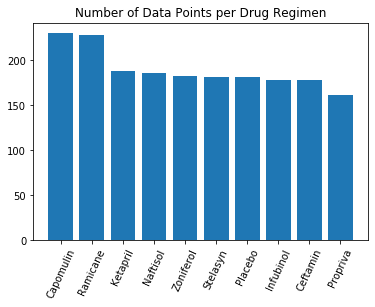

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(mouse_study_results["Drug Regimen"].value_counts().index, mouse_study_results["Drug Regimen"].value_counts())
plt.xticks( rotation=65 )
plt.title("Number of Data Points per Drug Regimen")

## Pie plots

Text(0, 0.5, '')

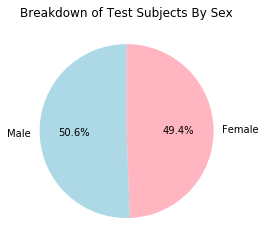

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = mouse_study_results["Sex"].value_counts()
sex_axis = sex_counts.plot( kind = "pie", title="Breakdown of Test Subjects By Sex", colors=["#add8e6", "#ffb6c1"], startangle=90, autopct="%1.1f%%")
sex_axis.set_ylabel("")

Text(0.5, 1.0, 'Breakdown of Test Subjects By Sex')

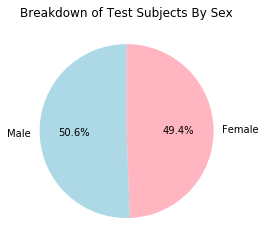

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index, colors=["#add8e6", "#ffb6c1"], autopct="%1.1f%%", startangle=90)
plt.title("Breakdown of Test Subjects By Sex")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Get list of most promising drugs by minimum of Mean Tumor Size
most_promising_drugs = tumor_stats_by_drug.sort_values(by="Mean Tumor Size").index[0:4]
print(most_promising_drugs)

#Filter down to only the most promising mice 
most_promising_mice = mouse_study_results
most_promising_mice = most_promising_mice.loc[most_promising_mice["Drug Regimen"].isin(most_promising_drugs)]
    
#Get the max time point for each mouse 
last_index_per_mouse = most_promising_mice.groupby("Mouse ID")["Timepoint"].idxmax()

#Reduce the mouse_study_results to only have the final time point for each mouse
most_promising_mice_final = mouse_study_results.iloc[last_index_per_mouse]

# Generate quartiles of mouse data
quartiles = most_promising_mice_final['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

upper_outliers = most_promising_mice_final.loc[most_promising_mice_final["Tumor Volume (mm3)"] > upper_bound]
lower_outliers = most_promising_mice_final.loc[most_promising_mice_final["Tumor Volume (mm3)"] < lower_bound]
num_outliers = upper_outliers.shape[0] + lower_outliers.shape[0]
print(f"There are {num_outliers} outliers in this data set")

Index(['Ramicane', 'Capomulin', 'Propriva', 'Ceftamin'], dtype='object', name='Drug Regimen')
Values below 5.529789873749998 could be outliers.
Values above 90.22325480375 could be outliers.
There are 0 outliers in this data set


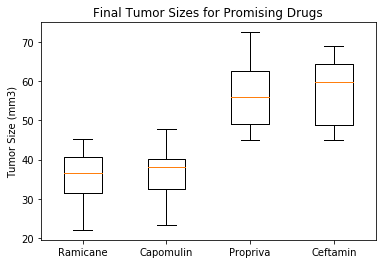

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes for Promising Drugs')
ax1.set_ylabel('Tumor Size (mm3)')

#Split data into 4 lists
boxplotDataByDrug = []
for drug in most_promising_drugs:
    boxplotDataByDrug.append(most_promising_mice_final.loc[most_promising_mice_final["Drug Regimen"] == drug]["Tumor Volume (mm3)"])

#Make the Box Plots
boxplot_return = ax1.boxplot(boxplotDataByDrug, labels=most_promising_drugs)


## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

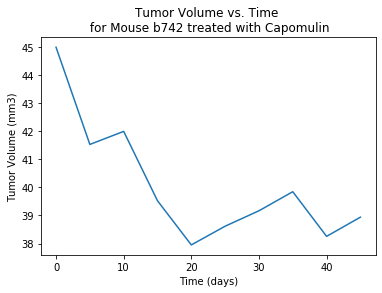

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
import random 
# Get a random mouse that was treated with Capomulin.
capomulin_mice = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == "Capomulin"]

random_mouse = random.choice(capomulin_mice["Mouse ID"].unique())
random_mouse_data = capomulin_mice.loc[capomulin_mice["Mouse ID"] == random_mouse]

plt.plot(random_mouse_data["Timepoint"], random_mouse_data["Tumor Volume (mm3)"])
plt.title( f"Tumor Volume vs. Time \n for Mouse {random_mouse} treated with Capomulin" )
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Mean Tumor Volume (mm3)')

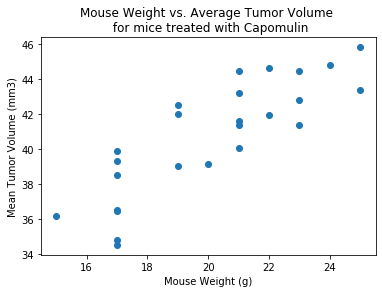

In [44]:
### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Get average tumor volume per capomulin mouse.
average_tumor_volumes = capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_mice_weights = capomulin_mice.groupby("Mouse ID")["Weight (g)"].mean()

#Make sure that we pain the volumes and weights by putting them in a dataframe since they share index.
scatterplot_data = pd.DataFrame()
scatterplot_data["Mean Tumor Volume"] = average_tumor_volumes
scatterplot_data["Mouse Weight"] = capomulin_mice_weights

plt.scatter(scatterplot_data["Mouse Weight"], scatterplot_data["Mean Tumor Volume"])
plt.title("Mouse Weight vs. Average Tumor Volume \n for mice treated with Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")


The coefficient of correlation is 0.8419363424694718


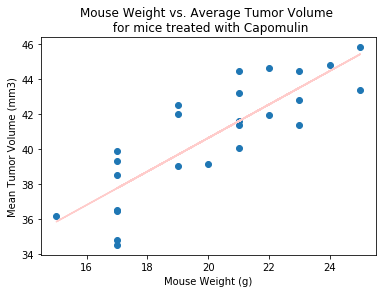

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatterplot_data["Mouse Weight"], scatterplot_data["Mean Tumor Volume"])
regress_values = scatterplot_data["Mouse Weight"] * slope + intercept

plt.scatter(scatterplot_data["Mouse Weight"], scatterplot_data["Mean Tumor Volume"])
plt.title("Mouse Weight vs. Average Tumor Volume \n for mice treated with Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.plot(scatterplot_data["Mouse Weight"],regress_values,"#FFCCCB")

print(f"The coefficient of correlation is {rvalue}")



